<a href="https://colab.research.google.com/github/Nivratti/edge_detection/blob/master/edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge detection

# Canny

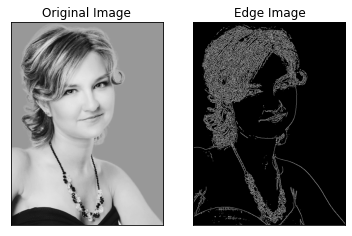

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/color_vis_2.jpg',0)

# edges = cv.Canny(img,100,200)

edges = cv.Canny(img,50,50)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

2.

In [0]:
import argparse
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage import color
from mpl_toolkits.mplot3d import Axes3D


def cannyEdge(img, sigma, th1, th2):
    """
    function finds the edges using Canny edge detection method...
    :param im:input image
    :param sigma: sigma is the std-deviation and refers to spread of gaussian
    :param th1:low threshold used to identify weak edges...
    :param th2: high threshold used to identify strong edges...
    :return:
    a binary edge image...
    """

    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = np.exp(-(x**2+y**2) / (2.0*sigma**2)) / \
        normal  # calculating gaussian filter

    kern_size, gauss = kernel.shape[0], np.zeros_like(img, dtype=float)

    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            gauss[i, j] = np.sum(window)

    kernel, kern_size = np.array(
        [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]), 3  # edge detection
    gx, gy = np.zeros_like(
        gauss, dtype=float), np.zeros_like(gauss, dtype=float)

    for i in range(gauss.shape[0]-(kern_size-1)):
        for j in range(gauss.shape[1]-(kern_size-1)):
            window = gauss[i:i+kern_size, j:j+kern_size]
            gx[i, j], gy[i, j] = np.sum(
                window * kernel.T), np.sum(window * kernel)

    magnitude = np.sqrt(gx**2 + gy**2)
    theta = ((np.arctan(gy/gx))/np.pi) * 180  # radian to degree conversion
    nms = np.copy(magnitude)

    theta[theta < 0] += 180

    # non maximum suppression; quantization and suppression done in same step
    for i in range(theta.shape[0]-(kern_size-1)):
        for j in range(theta.shape[1]-(kern_size-1)):
            if (theta[i, j] <= 22.5 or theta[i, j] > 157.5):
                if(magnitude[i, j] <= magnitude[i-1, j]) and (magnitude[i, j] <= magnitude[i+1, j]):
                    nms[i, j] = 0
            if (theta[i, j] > 22.5 and theta[i, j] <= 67.5):
                if(magnitude[i, j] <= magnitude[i-1, j-1]) and (magnitude[i, j] <= magnitude[i+1, j+1]):
                    nms[i, j] = 0
            if (theta[i, j] > 67.5 and theta[i, j] <= 112.5):
                if(magnitude[i, j] <= magnitude[i+1, j+1]) and (magnitude[i, j] <= magnitude[i-1, j-1]):
                    nms[i, j] = 0
            if (theta[i, j] > 112.5 and theta[i, j] <= 157.5):
                if(magnitude[i, j] <= magnitude[i+1, j-1]) and (magnitude[i, j] <= magnitude[i-1, j+1]):
                    nms[i, j] = 0

    weak, strong = np.copy(nms), np.copy(nms)

    # weak edges
    weak[weak < th1] = 0
    weak[weak > th2] = 0

    # strong edges
    strong[strong < th2] = 0
    strong[strong > th2] = 1

    # plotting multiple images
    fig = plt.figure()
    a = fig.add_subplot(2, 2, 1)
    imgplot = plt.imshow(gauss, cmap='gray')
    a.set_title('Gaussian')
    a = fig.add_subplot(2, 2, 2)
    imgplot = plt.imshow(magnitude, cmap='gray')
    a.set_title('Magnitude')
    a = fig.add_subplot(2, 2, 3)
    imgplot = plt.imshow(weak, cmap='gray')
    a.set_title('Weak edges')
    a = fig.add_subplot(2, 2, 4)
    imgplot = plt.imshow(255-strong, cmap='gray')
    a.set_title('Strong edges')
    plt.show()

    return gauss, magnitude, weak, strong



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in less


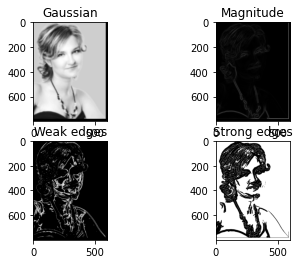

In [20]:

# def main():
#     oparser = argparse.ArgumentParser(description="Canny Edge detector")
#     oparser.add_argument("--input", dest="input_image", required=True,
#                          help="Path containing the image")
#     oparser.add_argument("--output", dest="output_image", required=True,
#                          help="Path containing the image")
#     oparser.add_argument("--sigma", dest="sigma", default=3, required=False,
#                          help="Sigma threshold", type=int)
#     oparser.add_argument("--th1", dest="lower_thresh", default=50, required=False,
#                          help="Lower threshold for edges", type=int)
#     oparser.add_argument("--th2", dest="upper_thresh", default=100, required=False,
#                          help="Upper threshold for edges", type=int)
#     options = oparser.parse_args()

#     img = io.imread(options.input_image)
#     img = color.rgb2gray(img)

#     gauss, magnitude, weak, strong = cannyEdge(
#         img, options.sigma, options.lower_thresh, options.upper_thresh)

#     io.imsave(f'{options.output_image}_{options.sigma}_{options.lower_thresh}_{options.upper_thresh}_gauss.jpg', gauss)
#     io.imsave(f'{options.output_image}_{options.sigma}_{options.lower_thresh}_{options.upper_thresh}_magnitude.jpg', magnitude)
#     io.imsave(f'{options.output_image}_{options.sigma}_{options.lower_thresh}_{options.upper_thresh}_weak.jpg', weak)
#     io.imsave(f'{options.output_image}_{options.sigma}_{options.lower_thresh}_{options.upper_thresh}_strong.jpg', strong)

# main()

input_image = "/content/color_vis_2.jpg"
sigma = 3
lower_thresh = 50
upper_thresh = 100

img = io.imread(input_image)
img = color.rgb2gray(img)

gauss, magnitude, weak, strong = cannyEdge(
    img, sigma, lower_thresh, upper_thresh)

io.imsave(f'gauss.jpg', gauss)
io.imsave(f'magnitude.jpg', magnitude)
io.imsave(f'weak.jpg', weak)
io.imsave(f'strong.jpg', strong)


# Structured Edge Detection demo

In [0]:
im = cv.imread("/content/color_vis_2.jpg");

edge_detection = cv.ximgproc.createStructuredEdgeDetection(model)
rgb_im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
edges = edge_detection.detectEdges(np.float32(rgb_im) / 255.0)

orimap = edge_detection.computeOrientation(edges)
edges = edge_detection.edgesNms(edges, orimap)

edge_boxes = cv.ximgproc.createEdgeBoxes()
edge_boxes.setMaxBoxes(30)
boxes = edge_boxes.getBoundingBoxes(edges, orimap)
boxes, scores = edge_boxes.getBoundingBoxes(edges, orimap)

if len(boxes) > 0:
    boxes_scores = zip(boxes, scores)
    for b_s in boxes_scores:
        box = b_s[0]
        x, y, w, h = box
        cv.rectangle(im, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)
        score = b_s[1][0]
        cv.putText(im, "{:.2f}".format(score), (x, y), cv.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1, cv.LINE_AA)
        print("Box at (x,y)=({:d},{:d}); score={:f}".format(x, y, score))

cv.imshow("edges", edges)
cv.imshow("edgeboxes", im)
cv.waitKey(0)
cv.destroyAllWindows()

In [0]:
""